# Import All Libraries

In [1]:
!pip3 install yfinance 
!pip install kats

     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 6.4 MB 41.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 6.3 MB 24.4 MB/s 
     |████████████████████████████████| 934 kB 44.1 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 31

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotly import graph_objs as go

import yfinance as yf
from datetime import date

# Scraping the Data from Yahoo Finance website

Specifying the Stock Ticker, Start and End date for scrapping data from yahoo finance. reset_index() is used to reset the scrapped data's first column which is date to the number of rows respectively.

You can comment reset_index() and view the changes via df.head()

In [3]:
start = "2010-01-01"
today = date.today().strftime("%Y-%m-%d")

ticker = 'AAPL'

data = yf.download(ticker, start, today)
data = data.reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459940,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447999,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490866,447610800


# Moving Average Analysis

Building a new data frame to plot date with respect to close, ma 100 and ma 200

**Note :**
If moving average 100 line goes above the moving average 200 then there is an Up Trend and vise-versa

In [ ]:
moving_avg_df = data.filter(['Date','Close'])
moving_avg_df.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [ ]:
moving_avg_100 = moving_avg_df['Close'].rolling(100).mean()
moving_avg_200 = moving_avg_df['Close'].rolling(200).mean()
moving_avg_df['Moving Avg 100'] = moving_avg_100
moving_avg_df['Moving Avg 200'] = moving_avg_200
moving_avg_df.tail()

,Date,Close,Moving Avg 100,Moving Avg 200
3026,2022-01-10,172.190002,156.2546,145.57955
3027,2022-01-11,175.080002,156.5384,145.84800
3028,2022-01-12,175.529999,156.8118,146.12615
3029,2022-01-13,172.190002,157.0366,146.37635
3030,2022-01-14,173.070007,157.2711,146.62670


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=moving_avg_df['Date'], y=moving_avg_df['Close'], name='Stock Close'))
fig.add_trace(go.Scatter(x=moving_avg_df['Date'], y=moving_avg_df['Moving Avg 100'], name='MA 100'))
fig.add_trace(go.Scatter(x=moving_avg_df['Date'], y=moving_avg_df['Moving Avg 200'], name='MA 200'))
fig.layout.update(title_text="Moving Average Vs Stock Close", xaxis_rangeslider_visible=True)
fig.show()

# Torch Fore Casting

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/air_passengers.csv
!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/multi_ts.csv

--2022-01-15 09:33:38--  https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/air_passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2165 (2.1K) [text/plain]
Saving to: ‘air_passengers.csv’

air_passengers.csv  100%[===================>]   2.11K  --.-KB/s    in 0s      

2022-01-15 09:33:38 (21.2 MB/s) - ‘air_passengers.csv’ saved [2165/2165]

--2022-01-15 09:33:39--  https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/multi_ts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 867

In [ ]:
air_passengers_df = pd.read_csv("air_passengers.csv")
air_passengers_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
train_df = data.filter(['Date','Close'])
train_df.head()

,Date,Close
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [5]:
# Time Series will only accept 'time' as its first data series/column
train_df = train_df.rename({'Date': 'time', 'Close': 'value'}, axis='columns')
train_df.head()

,time,value
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714


In [6]:
# TimeSeriesData is the basic data structure in Kats to represented univariate and multivariate time series.
from kats.consts import TimeSeriesData

time_series_data = TimeSeriesData(train_df)
time_series_data.is_data_missing()
time_series_data.is_univariate()
len(time_series_data)

3031

In [ ]:
# To check time series features 
#from kats.tsfeatures.tsfeatures import TsFeatures

# Step 1. initiate TsFeatures
#ts_features = TsFeatures()

#output_features = TsFeatures().transform(time_series_data)

In [ ]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=True) # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(time_series, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
forecast = m.predict(steps=10, freq="MS")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# plot to visualize
forecast

,time,fcst,fcst_lower,fcst_upper
0,2022-02-01,170.961207,164.619520,176.431923
1,2022-03-01,173.254616,167.455877,178.830430
2,2022-04-01,176.123313,170.199797,181.496125
3,2022-05-01,180.871032,174.797214,186.254684
4,2022-06-01,184.344463,178.315163,190.090014
5,2022-07-01,189.174282,183.257647,195.255568
6,2022-08-01,194.924607,188.490339,201.168516
7,2022-09-01,201.290932,193.707495,207.845490
8,2022-10-01,202.483505,194.650908,209.551141
9,2022-11-01,207.060956,199.123390,214.700158


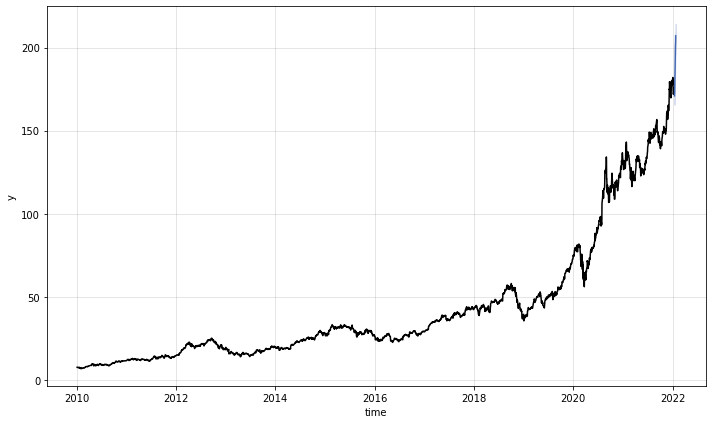

In [ ]:
m.plot()

# STLF

In [7]:
# import the param and model classes for Prophet model
from kats.models.stlf import STLFModel, STLFParams

# create a model param instance
params = STLFParams(method='prophet', m=12)

# create a prophet model instance
m = STLFModel(time_series_data, params)

# fit model simply by calling m.fit()
m.fit()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# make prediction for next 30 month
forecast = m.predict(steps=10, include_history=False)

forecast

,time,fcst,fcst_lower,fcst_upper
0,2022-01-15,169.364554,163.668215,175.032567
1,2022-01-16,170.108689,164.698377,175.644838
2,2022-01-17,169.548469,163.500453,175.061652
3,2022-01-18,167.571164,162.099409,173.246434
4,2022-01-19,168.225493,162.658525,173.504230
5,2022-01-20,168.093309,162.400371,173.236115
6,2022-01-21,169.189151,163.502199,174.983275
7,2022-01-22,170.773011,165.422593,176.233124
8,2022-01-23,171.823381,166.542752,177.420637
9,2022-01-24,170.184013,164.660901,175.439985


In [56]:
plot_df = train_df.append(forecast)
plot_df.tail()


fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_df['time'], y=plot_df['value'], name='Actual Stock Closing', line ={'color':'deepskyblue'}))
fig.add_trace(go.Scatter(x=plot_df['time'], y=plot_df['fcst'], name='Predicted Stock Closing', line ={'color':'limegreen'}))

fig.layout.update(title_text="Forecast",
                  xaxis=dict(
                    rangeselector=dict(
                    buttons=list([
                      dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate")]
                    ))), xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
plot_df.tail()

,time,value,fcst,fcst_lower,fcst_upper
5,2022-01-20,NaN,168.093309,162.739871,173.828144
6,2022-01-21,NaN,169.189151,163.720582,174.443226
7,2022-01-22,NaN,170.773011,165.276166,176.232197
8,2022-01-23,NaN,171.823381,166.371336,177.250831
9,2022-01-24,NaN,170.184013,165.083832,176.099584


# SARIMA Model

In [ ]:
from kats.models.sarima import SARIMAModel, SARIMAParams
import warnings
warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(
    p = 2, 
    d=1, 
    q=1, 
    trend = 'ct'
    )

# initiate SARIMA model
m = SARIMAModel(data=time_series_data, params=params)

# fit SARIMA model
m.fit()

In [ ]:
# generate forecast values
fcst = m.predict(steps=10, freq="MS")

# make plot to visualize
m.plot()

ValueError: ignored

# Holt Winters


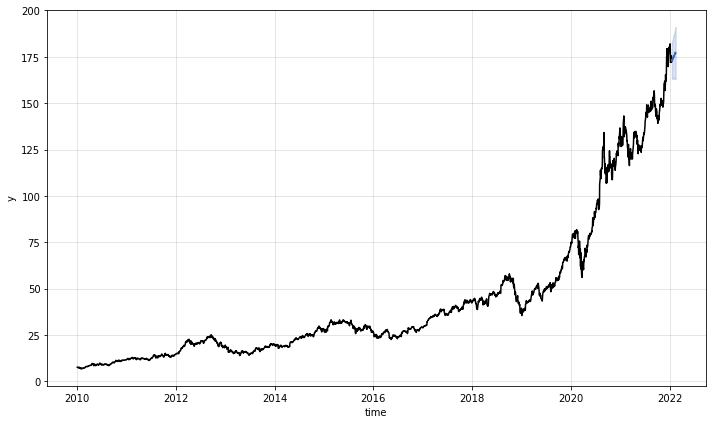

In [ ]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=time_series_data, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

# Theta Model

In [ ]:
# import param and model from `kats.models.theta`
from kats.models.theta import ThetaModel, ThetaParams

# create ThetaParam with specifying seasonality param value
params = ThetaParams(m=12)

# create ThetaModel with given data and parameter class
m = ThetaModel(data=time_series_data, params=params)

# call fit method to fit model
m.fit()

# call predict method to predict the next 30 steps
res = m.predict(steps=30, alpha=0.2)

# visualize the results
m.plot()

LinAlgError: ignored